In [3]:
import cv2

In [4]:
img1=cv2.imread("img/happy.jpg")

In [5]:
import matplotlib.pyplot as plt

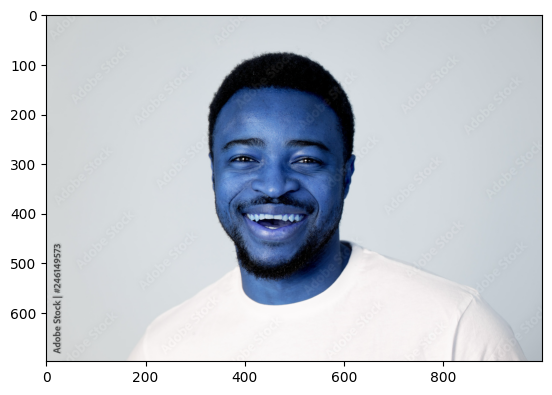

In [6]:
plt.imshow(img1)        #bgr image

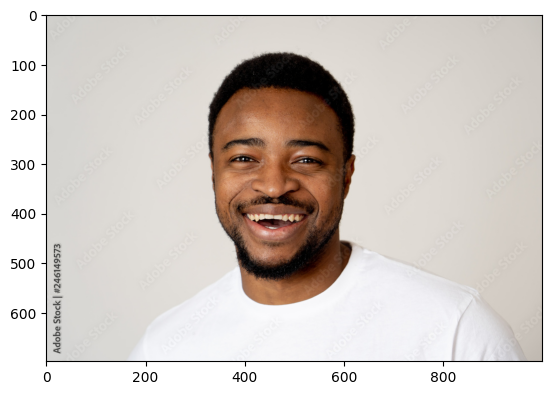

In [7]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

In [8]:
from deepface import DeepFace

In [9]:
predictions = DeepFace.analyze(img1)

Action: race: 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]   


In [10]:
predictions

[{'emotion': {'angry': np.float32(5.967967e-09),
   'disgust': np.float32(8.940113e-14),
   'fear': np.float32(4.0676077e-11),
   'happy': np.float32(93.06074),
   'sad': np.float32(1.2499183e-06),
   'surprise': np.float32(0.00022961714),
   'neutral': np.float32(6.93903)},
  'dominant_emotion': 'happy',
  'region': {'x': 303,
   'y': 161,
   'w': 321,
   'h': 321,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': np.float64(0.92),
  'age': 30,
  'gender': {'Woman': np.float32(0.0005738107), 'Man': np.float32(99.99943)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(8.521514e-12),
   'indian': np.float32(2.4298623e-09),
   'black': np.float32(100.0),
   'white': np.float32(1.2781496e-16),
   'middle eastern': np.float32(2.4926057e-16),
   'latino hispanic': np.float32(5.1218807e-10)},
  'dominant_race': 'black'}]

In [11]:
type(predictions)

list

In [12]:
print(predictions[0]['dominant_emotion'])

happy


In [13]:
# drawing rectangle on the image 
# "haar" is famous face recognition algorithm :)


faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [14]:
gray = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)

In [15]:
faces=faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img1 ,pt1=(x,y),pt2=((x+w),(y+h)),color=(0,255,0),thickness=2)

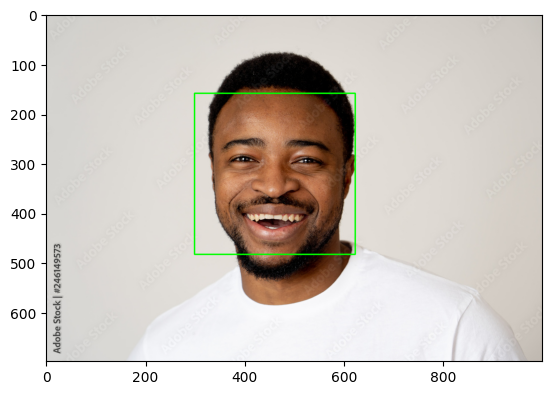

In [16]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

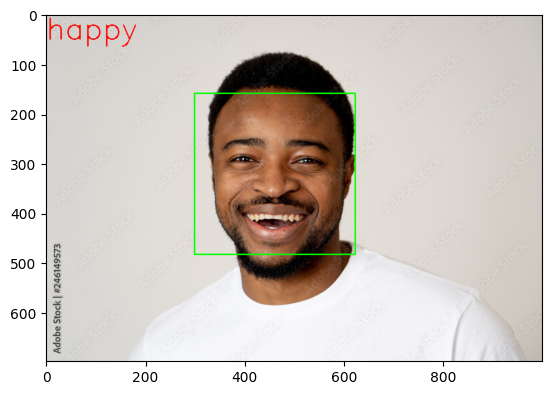

In [17]:
#writing text

font= cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img1, predictions[0]['dominant_emotion'] , (0,50) ,font , 2 , (0,0,255), 2, cv2.LINE_4) 
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

In [18]:
img2=cv2.imread("img/sad.jpg")

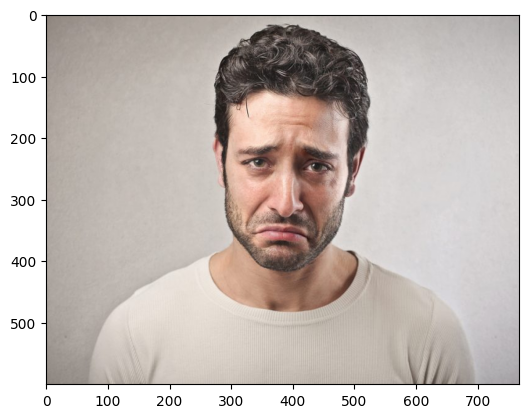

In [19]:
plt.imshow(cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB))

In [20]:
predictions = DeepFace.analyze(img2)

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]  


In [21]:
predictions

[{'emotion': {'angry': np.float32(22.508007),
   'disgust': np.float32(0.016888961),
   'fear': np.float32(7.036743),
   'happy': np.float32(0.002054528),
   'sad': np.float32(52.141884),
   'surprise': np.float32(0.063882254),
   'neutral': np.float32(18.230541)},
  'dominant_emotion': 'sad',
  'region': {'x': 256,
   'y': 137,
   'w': 277,
   'h': 277,
   'left_eye': (432, 247),
   'right_eye': (344, 241)},
  'face_confidence': np.float64(0.9),
  'age': 29,
  'gender': {'Woman': np.float32(0.0011184309), 'Man': np.float32(99.99888)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(0.017049976),
   'indian': np.float32(6.507858),
   'black': np.float32(0.024650961),
   'white': np.float32(15.3894205),
   'middle eastern': np.float32(70.06284),
   'latino hispanic': np.float32(7.998186)},
  'dominant_race': 'middle eastern'}]

In [22]:
print(predictions[0]['dominant_emotion'])

sad


In [23]:
img3=cv2.imread("img/angry.jpg")

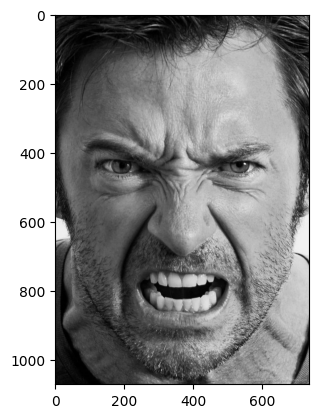

In [24]:
plt.imshow(cv2.cvtColor(img3 , cv2.COLOR_BGR2RGB))

In [25]:
predictions = DeepFace.analyze(img3)

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]  


In [26]:
predictions

[{'emotion': {'angry': np.float32(74.45134),
   'disgust': np.float32(0.0057242895),
   'fear': np.float32(25.541397),
   'happy': np.float32(8.014773e-08),
   'sad': np.float32(0.0015393703),
   'surprise': np.float32(4.3903623e-07),
   'neutral': np.float32(3.89661e-07)},
  'dominant_emotion': 'angry',
  'region': {'x': 0,
   'y': 102,
   'w': 735,
   'h': 865,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': np.float64(0.93),
  'age': 40,
  'gender': {'Woman': np.float32(0.00037586517), 'Man': np.float32(99.99962)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(0.18893397),
   'indian': np.float32(0.75486785),
   'black': np.float32(0.12161737),
   'white': np.float32(83.70362),
   'middle eastern': np.float32(7.7136364),
   'latino hispanic': np.float32(7.5173144)},
  'dominant_race': 'white'}]

In [27]:
print(predictions[0]['dominant_emotion'])

angry


# REAL TIME VIDEO DEMO FOR FACE EMOTIO RECOGNITION

In [28]:
import cv2
from deepface import DeepFace

# Load pre-trained face detection model
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray_frame, 1.1, 4)

    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w]  # Extract face region
        result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)

        if isinstance(result, list) and len(result) > 0:  # Ensure valid detection
            dominant_emotion = result[0].get('dominant_emotion', 'Unknown').lower()

            # Highlight detected faces
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Display the detected emotion
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(frame, dominant_emotion.capitalize(), (x, y - 10), font, 0.8, (0, 0, 255), 2)

    # Show video
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cap.release()
cv2.destroyAllWindows()
